# Cars Price Dataset

**About Dataset**
This dataset consist of data From 1985 Ward's Automotive Yearbook.

**Content**
This data set consists of three types of entities: 
- (a) the specification of an auto in terms of various characteristics, 
- (b) its assigned insurance risk rating, 
- (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
- The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Load Dataset

In [2]:
df = pd.read_csv('D:/DS Bootcamp/Machine Learning/machine learning projects/Machine-Learning-Projects/Automobile Price Prediction/cars_price.csv')
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
17877,0.0,?,audi,gas,turbo,NaN,NaN,4wd,front,99.5,178.2,67.9,52.0,3053.0,ohc,five,131.0,mpfi,3.13,3.4,7.0,160,5500,16.0,22.0,?
1839,NaN,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,NaN,2275.0,ohc,four,109.0,mpfi,3.19,3.4,9.0,85,5250,NaN,34.0,8495
27894,-2.0,103,volvo,gas,NaN,four,NaN,rwd,front,104.3,188.8,67.2,56.2,3045.0,ohc,four,NaN,mpfi,3.62,3.15,7.5,162,5100,NaN,22.0,18420
1745,0.0,85,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304.0,ohc,four,110.0,1bbl,NaN,3.58,9.0,86,NaN,27.0,33.0,8845
13587,NaN,104,NaN,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1900.0,ohc,four,91.0,2bbl,3.03,3.15,9.0,68,5000,31.0,NaN,6095


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

------

## Handle Data Anomilies

In [4]:
question_mark_counts = (df == '?').sum()
question_mark_counts = question_mark_counts[question_mark_counts > 0]

print("Columns containing '?'\n")
print(question_mark_counts)

Columns containing '?'

normalized-losses    5526
num-of-doors          260
bore                  531
stroke                532
horsepower            260
peak-rpm              250
price                 563
dtype: int64


**Our first anomilie is '?' in the dataset. We will replace it with NaN**


In [5]:
for i in df[['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']]:
    df[i].replace('?', np.nan, inplace = True)

**Lets check '?' removed ore not**

In [6]:
df[df['bore'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


**Firslt anomily solved**

**2nd we have wrong Dtypes of columns**
- Change ['bore', 'stroke', 'normalized-losses', 'horsepower', 'peak-rpm', 'price'] into number

In [7]:
for column in ['bore', 'stroke', 'normalized-losses', 'horsepower', 'peak-rpm', 'price']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [8]:
df.dtypes

symboling            float64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

**Data types issue resolved**

**Lets check more deeper in data**

In [9]:
print(f'Total no of numerical columns are: {len(df.select_dtypes(include='number').columns)}')
print('=====================================')
print(f'Total no of categorical columns are: {len(df.select_dtypes(include='object').columns)}')
print('=====================================')

for col in df.select_dtypes(include='number').columns:
    print(f'No of Unique values {col}: {df[col].nunique()}')
print('=====================================')

for col in df.select_dtypes(include='object').columns:
    print(f'\n{df[col].value_counts().head()}')
print('=====================================')

for col in df.select_dtypes(include='number').columns:
    print(f'\nUnique values of {col}: {df[col].unique()}')

Total no of numerical columns are: 16
Total no of categorical columns are: 10
No of Unique values symboling: 6
No of Unique values normalized-losses: 51
No of Unique values wheel-base: 53
No of Unique values length: 75
No of Unique values width: 44
No of Unique values height: 49
No of Unique values curb-weight: 171
No of Unique values engine-size: 44
No of Unique values bore: 38
No of Unique values stroke: 36
No of Unique values compression-ratio: 32
No of Unique values horsepower: 59
No of Unique values peak-rpm: 23
No of Unique values city-mpg: 29
No of Unique values highway-mpg: 30
No of Unique values price: 186

make
toyota        4229
nissan        2338
mazda         2277
mitsubishi    1796
honda         1644
Name: count, dtype: int64

fuel-type
gas       24671
diesel     2638
Name: count, dtype: int64

aspiration
std      22383
turbo     4972
Name: count, dtype: int64

num-of-doors
four    15292
two     11769
Name: count, dtype: int64

body-style
sedan          12776
hatchback   

**All anomilies resolved**

----------

## Handle Missing Values

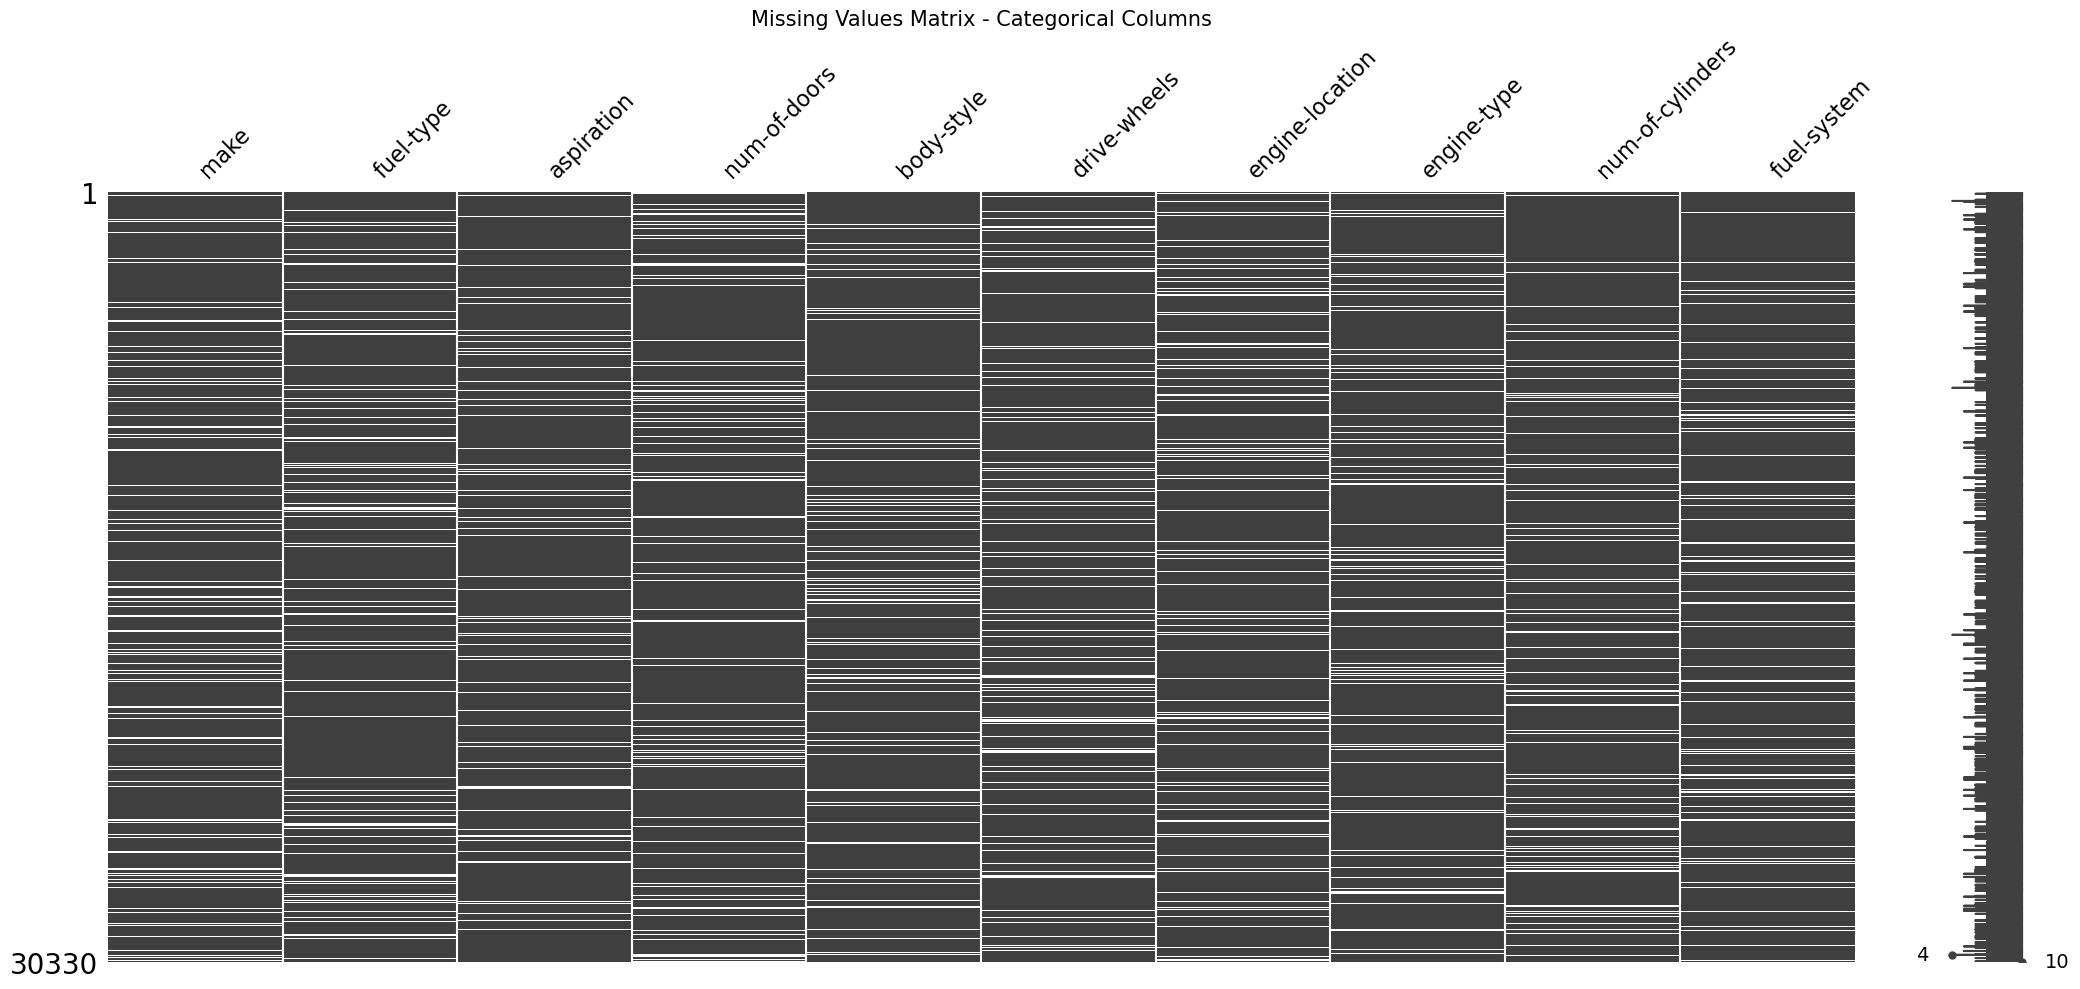

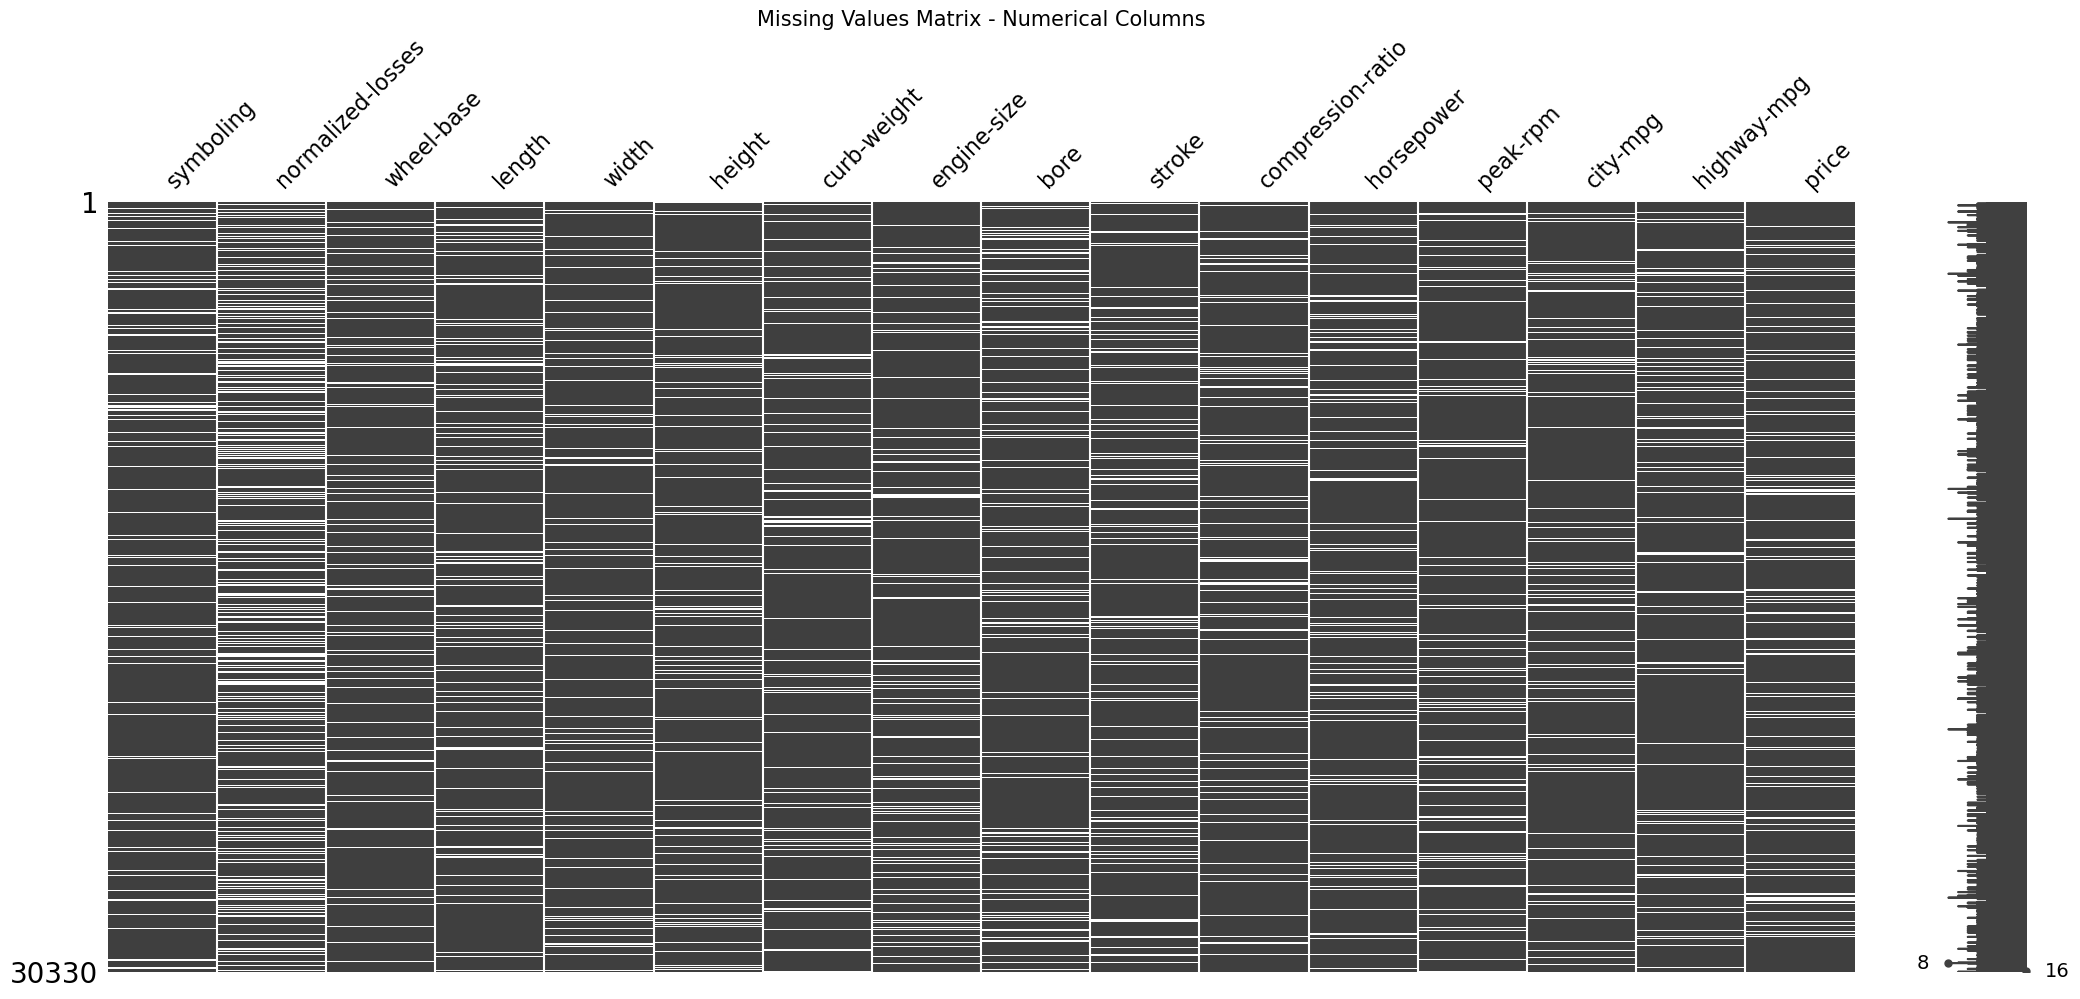

In [10]:
msn.matrix(df.select_dtypes(include=['object']))
plt.title('Missing Values Matrix - Categorical Columns', fontsize=15)
plt.show()

msn.matrix(df.select_dtypes(include=['number']))
plt.title('Missing Values Matrix - Numerical Columns', fontsize=15)
plt.show()

**Every columns missing values is MCAR, thats a good to go**

In [11]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index().rename(columns={'index':'feature', 0:'null_percentage'})

,feature,null_percentage
0,normalized-losses,28.229476
1,price,11.889219
2,bore,11.500165
3,stroke,11.384768
4,horsepower,11.236400
5,num-of-doors,10.778107
6,peak-rpm,10.712166
7,drive-wheels,10.270359
8,make,10.227498
9,city-mpg,10.224200


- The 'price' column is our target variable, and we should not impute missing values for it. Filling these missing values could introduce bias into the model, leading to inaccurate predictions and affecting the integrity of the model's results
- Split num columns and cat columns then fill with their appropriate method
- Lastly we check the missing values > `20%` how to deal them so no random noise occurs 

In [12]:
df = df.dropna(subset=['price'])

**First we deal with the numerical features**

In [13]:
numerical_features = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

**Lets make a Distribution Plot to look the columns behave**

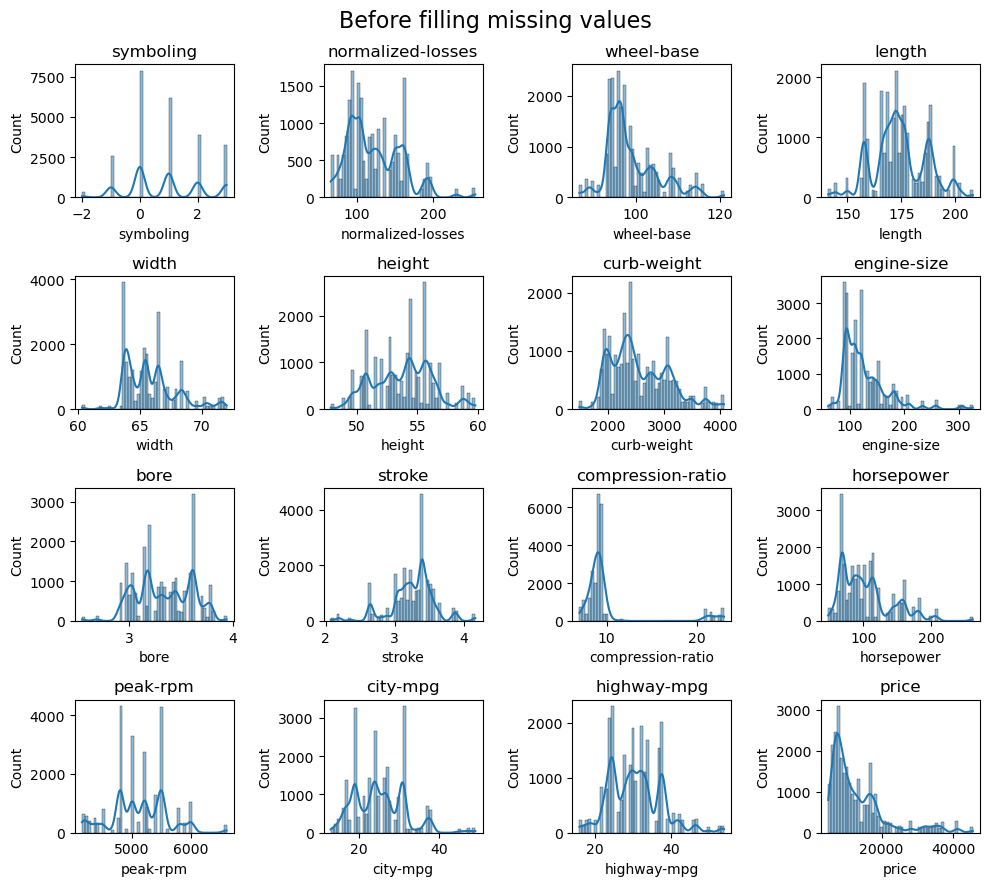

In [14]:
plt.figure(figsize=(10, 9))

for i, col in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)  
    sns.histplot(df[col], bins=50, kde=True, )
    plt.title(f'{col}')

plt.suptitle('Before filling missing values', fontsize=16)

plt.tight_layout()
plt.show()

In [15]:
without_normalzie = ['symboling', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

df[without_normalzie] = df[without_normalzie].fillna(df[without_normalzie].median())
df[without_normalzie].isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

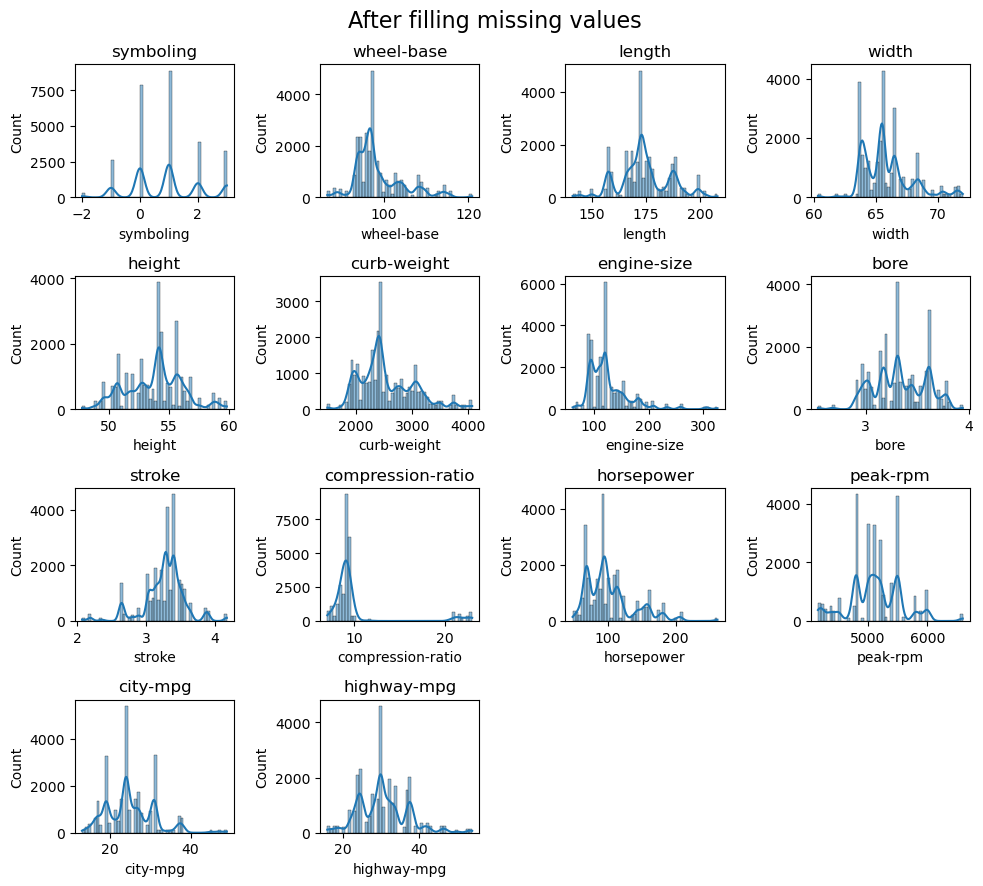

In [16]:
plt.figure(figsize=(10, 9))

for i, col in enumerate(df[without_normalzie]):
    plt.subplot(4, 4, i+1)  
    sns.histplot(df[col], bins=50, kde=True, )
    plt.title(f'{col}')

plt.suptitle('After filling missing values', fontsize=16)

plt.tight_layout()
plt.show()

**Random Sampling**

In [17]:
missing_mask = df['normalized-losses'].isnull()

imputed_values = df.loc[~missing_mask, 'normalized-losses'].sample(
    n=missing_mask.sum(), replace=True, random_state=42)

df.loc[missing_mask, 'normalized-losses'] = imputed_values.values

<Axes: ylabel='Density'>

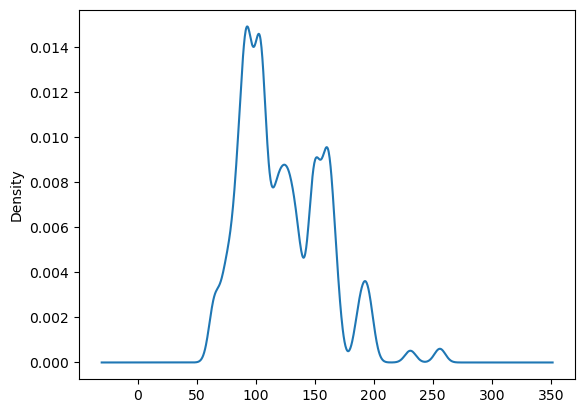

In [18]:
df['normalized-losses'].plot(kind='kde')

**SO the distribution remains same as after filling missing values**

**Handle categorical features**


In [19]:
categorical_features= ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system']

In [20]:
cat_columns_missing_values = (df[categorical_features].isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index()
cat_columns_missing_values.columns = ['Cat Features', 'Missing Percentage %']
cat_columns_missing_values

,Cat Features,Missing Percentage %
0,num-of-doors,10.780572
1,drive-wheels,10.223021
2,make,10.189343
3,fuel-system,10.163149
4,engine-type,10.155665
5,num-of-cylinders,10.028439
6,fuel-type,9.991019
7,engine-location,9.897470
8,body-style,9.848825
9,aspiration,9.747792


In [21]:
df['make'].replace('peugot', 'peugeot', inplace=True)

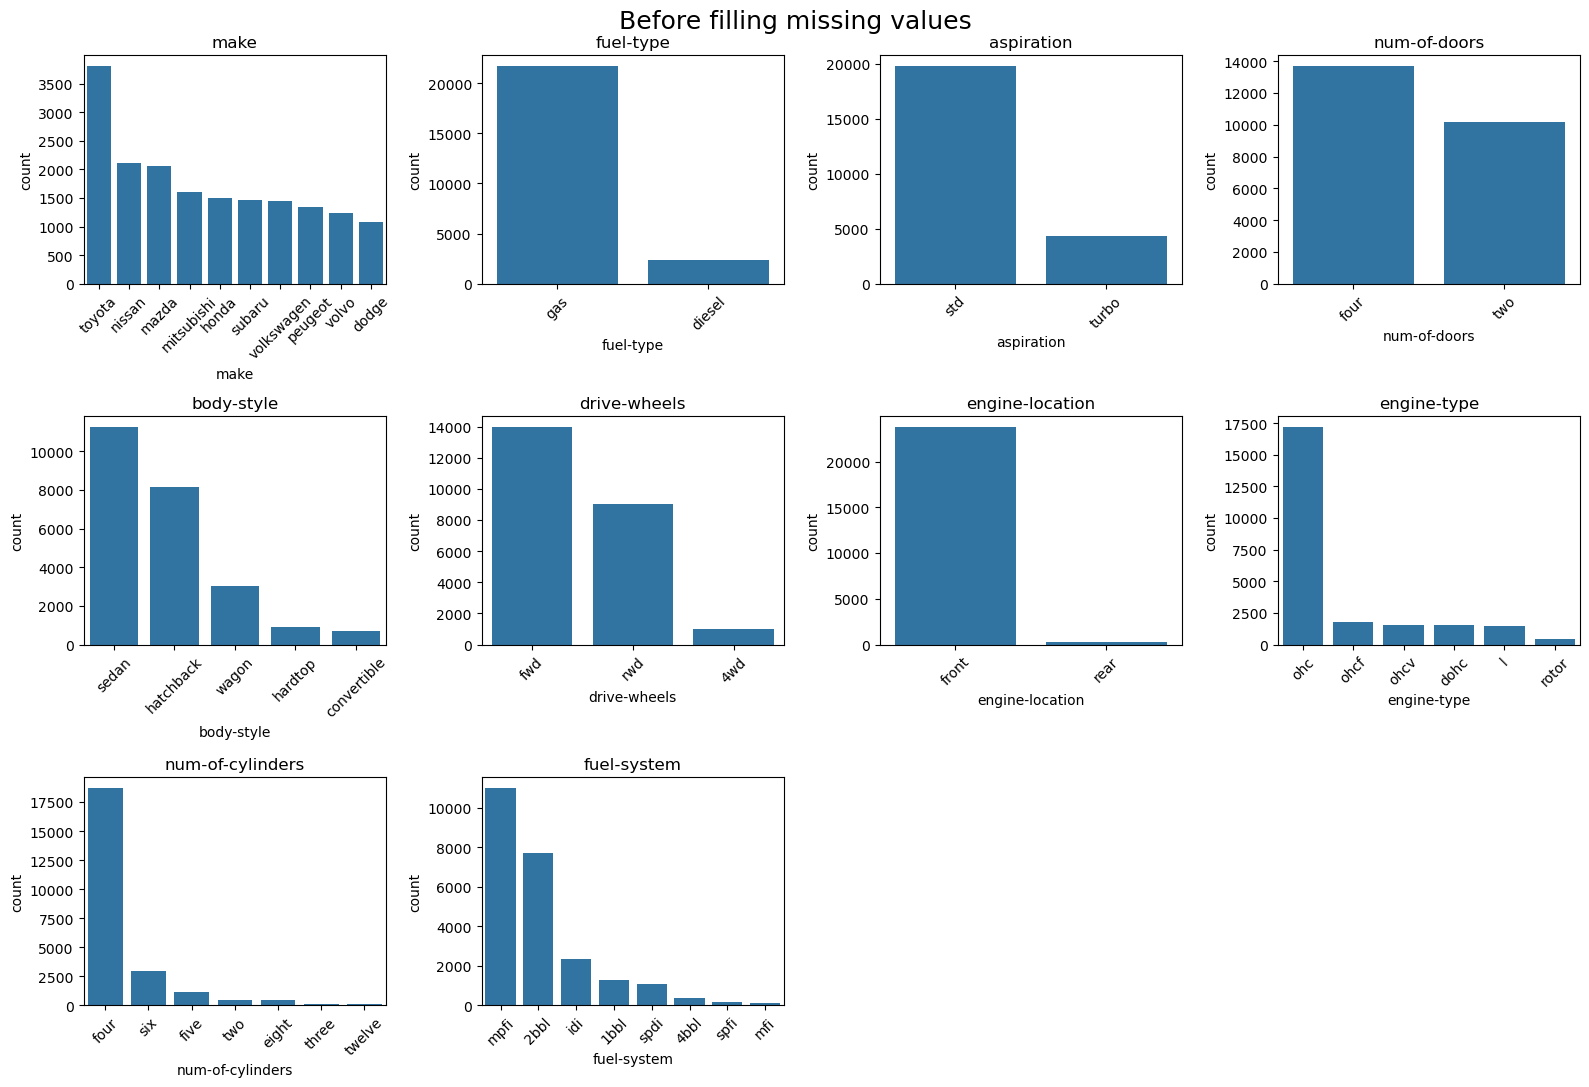

In [22]:
plt.figure(figsize=(16, 14))

for i, col in enumerate(categorical_features):
    plt.subplot(4, 4, i+1)  
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index)
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    

plt.suptitle('Before filling missing values', fontsize=18)
plt.tight_layout()  
plt.show()

In [23]:
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

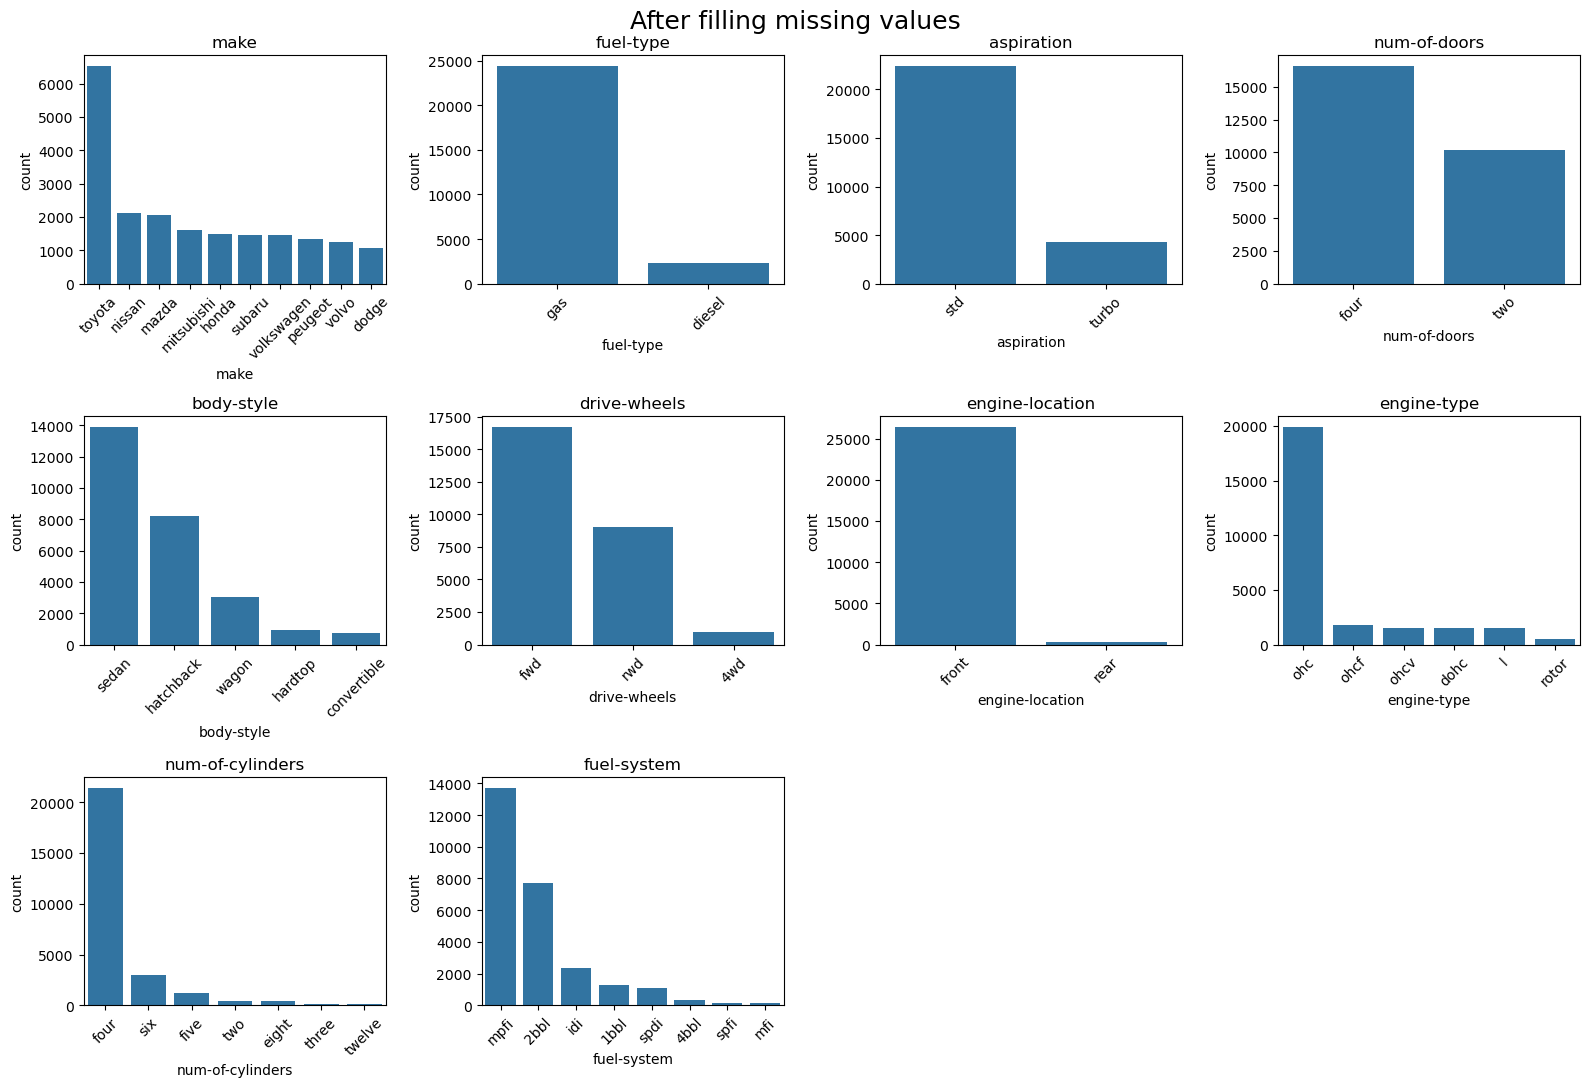

In [24]:
plt.figure(figsize=(16, 14))

for i, col in enumerate(df[categorical_features]):
    plt.subplot(4, 4, i+1)  
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index)
    plt.title(f'{col}')
    plt.xticks(rotation=45)

plt.suptitle('After filling missing values', fontsize=18)
plt.tight_layout()  
plt.show()

**DONE**

------------

## Deal With Outliers

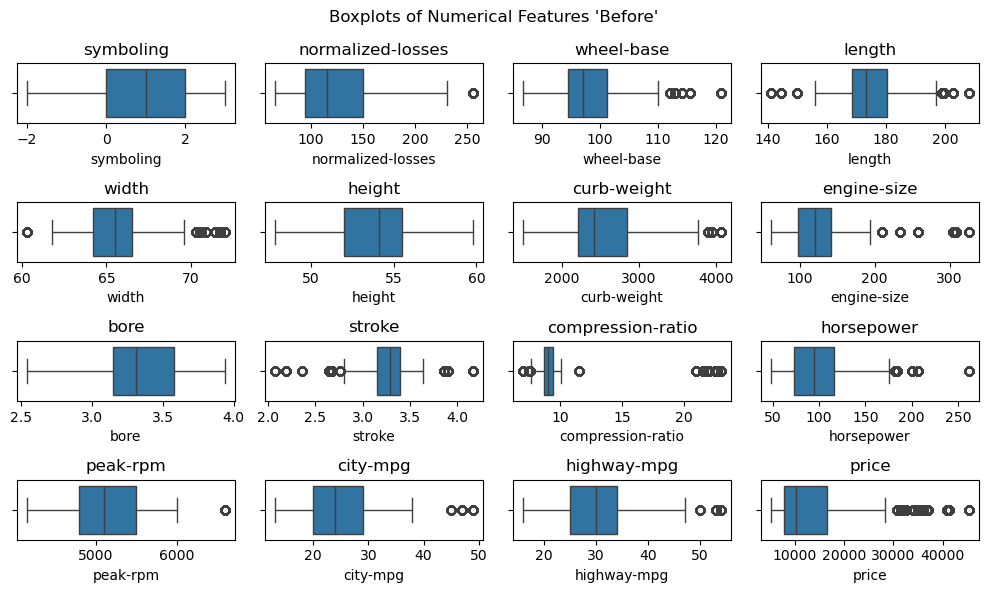

In [25]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_features):
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.suptitle("Boxplots of Numerical Features 'Before'")
plt.tight_layout()
plt.show()

In [26]:
outliers = {}

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    
    outlier_values = df[(df[col] > upper_limit) | (df[col] < lower_limit)][col]
    
    outliers[col] = outlier_values.tolist()

    print(f"\nColumn: {col}")
    print(f"Upper Limit: {upper_limit}, Lower Limit: {lower_limit}")


Column: symboling
Upper Limit: 5.0, Lower Limit: -3.0

Column: normalized-losses
Upper Limit: 234.0, Lower Limit: 10.0

Column: wheel-base
Upper Limit: 111.25, Lower Limit: 84.44999999999999

Column: length
Upper Limit: 197.70000000000005, Lower Limit: 151.29999999999995

Column: width
Upper Limit: 69.94999999999999, Lower Limit: 60.75000000000001

Column: height
Upper Limit: 60.75, Lower Limit: 46.75

Column: curb-weight
Upper Limit: 3799.5, Lower Limit: 1259.5

Column: engine-size
Upper Limit: 205.5, Lower Limit: 33.5

Column: bore
Upper Limit: 4.2250000000000005, Lower Limit: 2.505

Column: stroke
Upper Limit: 3.775, Lower Limit: 2.775

Column: compression-ratio
Upper Limit: 10.450000000000003, Lower Limit: 7.649999999999998

Column: horsepower
Upper Limit: 180.5, Lower Limit: 8.5

Column: peak-rpm
Upper Limit: 6550.0, Lower Limit: 3750.0

Column: city-mpg
Upper Limit: 42.5, Lower Limit: 6.5

Column: highway-mpg
Upper Limit: 47.5, Lower Limit: 11.5

Column: price
Upper Limit: 29587

-------

- `normalized-losses` is a numeric feature representing the relative average loss payment per insured vehicle (i.e., risk rating) for a particular car make and model, compared to other vehicles.
    - Low (e.g., 65)	Lower risk of loss → lower insurance cost
    - High (e.g., 250)	Higher risk of loss → higher insurance cost
- `Wheelbase` is the distance between the centers of the front and rear wheels of a vehicle.
    - Compact Car (e.g., Honda Fit): shorter wheelbase (~2300 mm)
    - Sedan (e.g., Toyota Camry): medium wheelbase (~2800 mm)
    - SUV/Truck (e.g., Ford F-150): long wheelbase (~3200+ mm)
- `Length` is the total distance from the front bumper to the rear bumper of the vehicle.
    - Compact cars	~155 – 170
    - Midsize cars	~170 – 185
    - Full-size/SUVs	~185 – 208+
- `Width` is the distance across the car from side to side, measured at its widest point, usually including mirrors unless stated otherwise.
- `Curb weight` is the total weight of a vehicle with all standard equipment, fluids (oil, coolant, etc.), and a full tank of fuel — but without any passengers or cargo.
    - 1,500 – 2,000 lbs	Subcompact (e.g., small hatchbacks)
    - 2,000 – 3,000 lbs	Sedans, compact SUVs
    - 3,000 – 4,500 lbs	Full-size sedans, SUVs, trucks
    - 4,500 lbs	Heavy-duty SUVs, luxury vehicles, pickups
- `engine size` the total volume of all the cylinders in the engine, and it’s typically measured in liters (L) or cubic centimeters (cc)
    - 61 cc is much too small for typical car engines — it’s in the realm of motorcycles or go-karts.
    - 326 cc is still quite small for a car, as most car engines range from 1.0L (1000 cc) to 5.0L and higher.
- `stroke` refers to the distance the piston travels inside the engine cylinder from the top dead center (TDC) to the bottom dead center (BDC)
    - range (2.07 to 4.17 inches) is within a realistic range for many vehicles.
- `compression` ratio in cars is a key engine parameter that measures how much the air-fuel mixture is compressed inside the engine cylinder before ignition.
    - 7 might be used in older petrol engines or boosted engines where lower compression avoids knock.
    - 23 typical of diesel engines which require high compression for ignition.
- `horsepower` it tells you how much work an engine can do over time.
    - 40 – 80	Very low, micro or city cars
    - 80 – 120	Economy cars, basic sedans
    - 120 – 180	Mid-range, family cars
    - 180 – 250	Sporty or performance cars
    - 250+	High-performance/sports cars
- `peak-rpm`  it measures how many times the engine’s crankshaft spins in one minute.
    - 4,150 (min)	Likely the peak torque RPM of a diesel engine or a low-revving petrol engine — common in utility or economy cars.
    - 6,600 (max)	Likely the peak horsepower RPM of a high-revving petrol engine — could be a sporty or performance-oriented car.
- `city-mpg` is the number of miles that a car can travel on a gallon of gasoline in the city.
    - Very low fuel efficiency, likely a large SUV, truck, or sports car with a big engine.
    - Very high fuel efficiency, likely a hybrid, compact car, or small diesel engine. Could also be an electric car equivalent, depending on dataset.
- `highway-mpg` is the number of miles that a car can travel on a gallon of gasoline on the highway.
    - Very low fuel efficiency, likely a large SUV, truck, or sports car with a big engine.
    - Very high fuel efficiency, likely a hybrid, compact car, or small diesel engine. Could also be an electric car equivalent.
- `price` is the price of the car in thousands of dollars.
    - That is not outliers we have some luxary cars like (mercedez, audi, bmw, etc) that price are more than 300K / 400k.

-------

## Exploratory Data Analysis

### Univariate Analysis

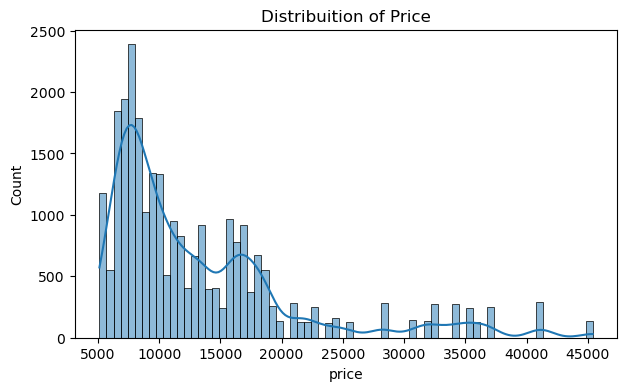

In [27]:
plt.figure(figsize=(7,4))
sns.histplot(x= df['price'], kde=True)
plt.title('Distribuition of Price')
plt.show()

**Price distribution is right skewed**

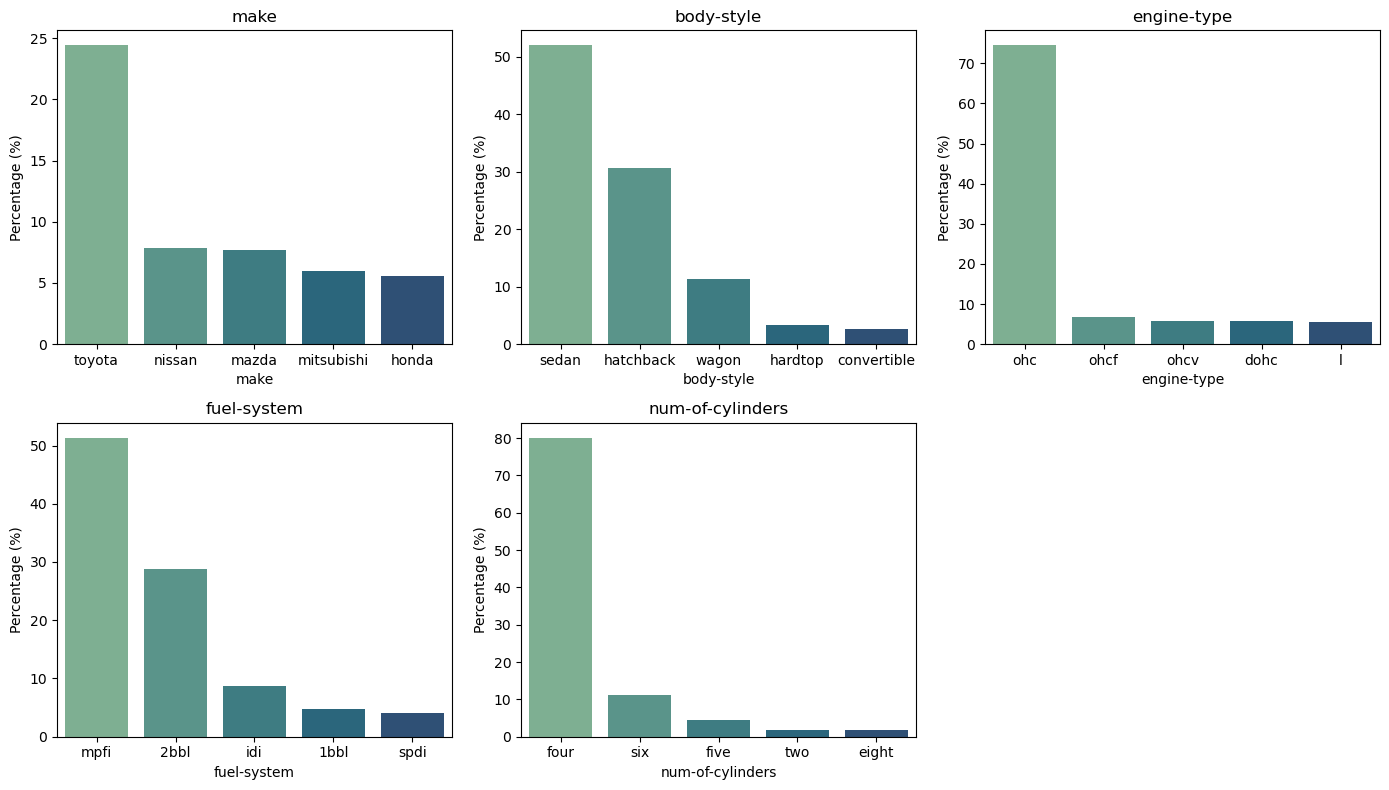

In [28]:
a = ['make', 'body-style', 'engine-type', 'fuel-system', 'num-of-cylinders']

plt.figure(figsize=(14, 8))
for i, col in enumerate(a):
    plt.subplot(2, 3, i+1)
    
    category_percentage = df[col].value_counts(normalize=True).mul(100).nlargest(5)
    sns.barplot(x=category_percentage.index, y=category_percentage.values, palette='crest')
    plt.title(f'{col}')
    plt.ylabel('Percentage (%)')
    
plt.tight_layout()
plt.show()

- `Toyota` emerges as the most popular car brand, comprising approximately `24%` of all entries in the dataset.
- This dominance suggest `Toyota's` strong presence in the market or a higher availability of Toyota cars in the dataset.
- The `sedan` is the most common car type, making up around `50%` of the dataset.
- `Sedans` are traditionally favored for their balance of `comfort, space, and fuel efficiency`, making this finding consistent with market trends.
- An impressive `70%` of the cars in the dataset feature an `OHC (Overhead Camshaft) engine`.
- `OHC` engines are known for their `reliability and efficiency`, which may explain their prevalence in the dataset.
- The `MPFI (Multi-Point Fuel Injection)` system is used in `50%` of the vehicles in the dataset.
- `MPFI` is known for `improving fuel efficiency` and reducing emissions, which may explain its popularity in more recent vehicle models.
- The most common engine configuration in the dataset is the `4-cylinder engine`, which accounts for a dominant `78%` of the entries.
- This high percentage suggests that `4-cylinder engines are widely preferred in the dataset`, likely due to their balance of performance, fuel efficiency, and cost-effectiveness, which makes them popular in economy and compact cars.

---------

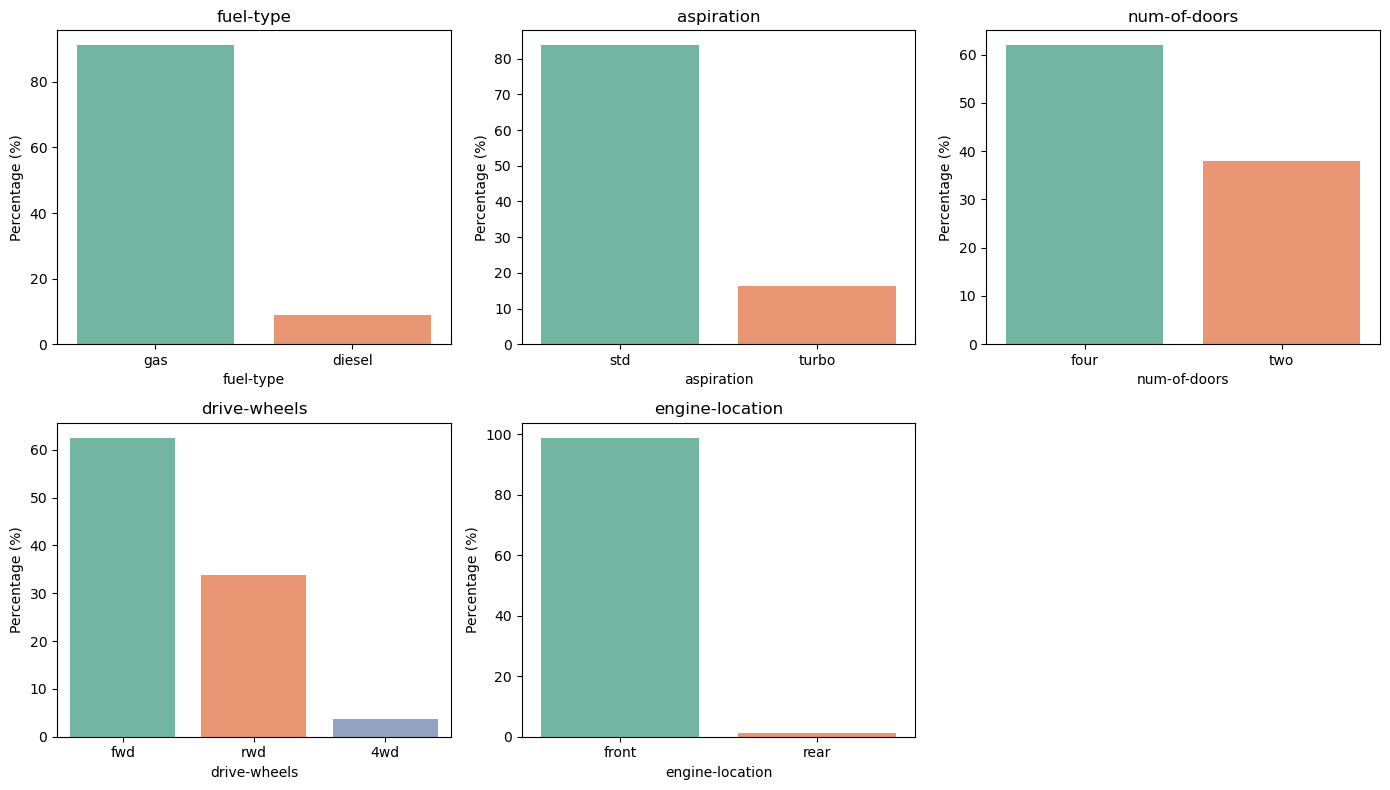

In [29]:
b = ['fuel-type', 'aspiration', 'num-of-doors', 'drive-wheels', 'engine-location']

plt.figure(figsize=(14, 8))
for i, col in enumerate(b):
    plt.subplot(2, 3, i+1)
    
    category_percentage = df[col].value_counts(normalize=True).mul(100).nlargest(5)
    sns.barplot(x=category_percentage.index, y=category_percentage.values, palette='Set2')
    plt.title(f'{col}')
    plt.ylabel('Percentage (%)')
    
plt.tight_layout()
plt.show()

- `90%` of the cars in the dataset use `gasoline` as their fuel type.
- This highlights the dominance of gas-powered vehicles in the dataset, aligning with general market trends where `gasoline is the most common fuel type`.
- A substantial `80%` of the vehicles in the dataset are equipped with standard aspiration `(non-turbocharged engines)`.
- This indicates that `turbocharged engines are relatively rare` in this dataset compared to more conventional, naturally aspirated engines.
- The majority of cars, `60%, feature four doors`.
- `Four-door vehicles` are popular due to their practicality, especially in sedans and family cars.
- `60% of the cars in the dataset have `front-wheel drive (FWD)`.
- `Front-wheel drive` is common in compact and mid-size sedans due to its lower cost and better fuel efficiency in most driving conditions.
- An overwhelming `95%` of the vehicles in the dataset have their engine located at the front.

----------

### Bivariate Analysis

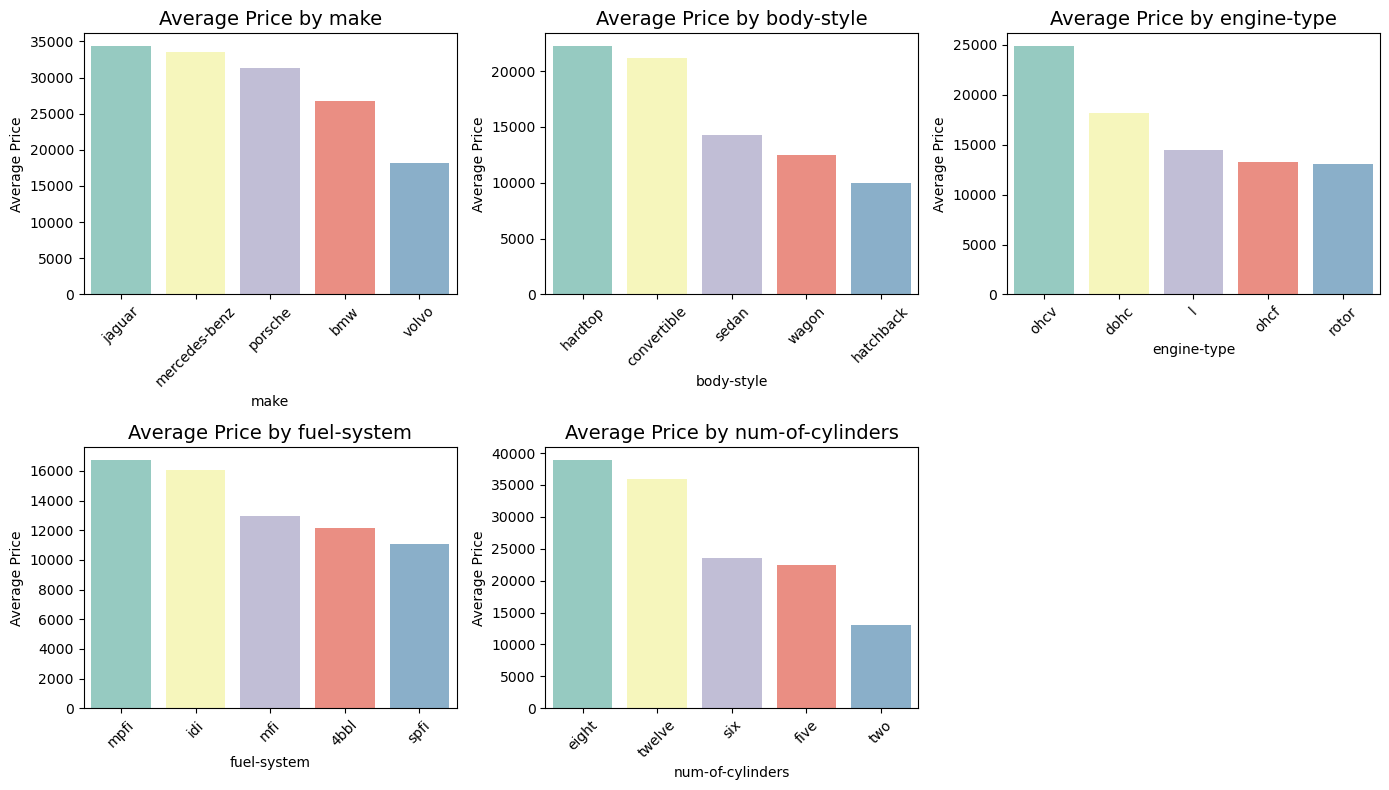

In [30]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(a):
    plt.subplot(2, 3, i+1)
    
    price_analysis = df.groupby(col)['price'].mean().reset_index().sort_values(by='price', ascending=False).head(5)
    sns.barplot(x=price_analysis[col], y=price_analysis['price'], palette='Set3')
    plt.title(f'Average Price by {col}', fontsize=14)
    plt.ylabel('Average Price')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- `Jaguar, Mercedes-Benz, Porsche, and BMW` are the `most expensive` car brands in the dataset, with an average price significantly higher than others.
- `Hardtop and Convertible body` styles are the most expensive, typically associated with more luxurious or performance-oriented vehicles.
- `OHCV engine type` is the most expensive, likely indicating a `higher-performance engine` configuration.
- `MPFI (Multi-Point Fuel Injection) and IDI (Indirect Injection) fuel systems` are associated with the highest prices in the dataset, suggesting these systems are typically found in higher-end vehicles.
- Cars with `8 and 12 cylinders` tend to have the highest average prices, reflecting their association with powerful, high-performance vehicles.

-------

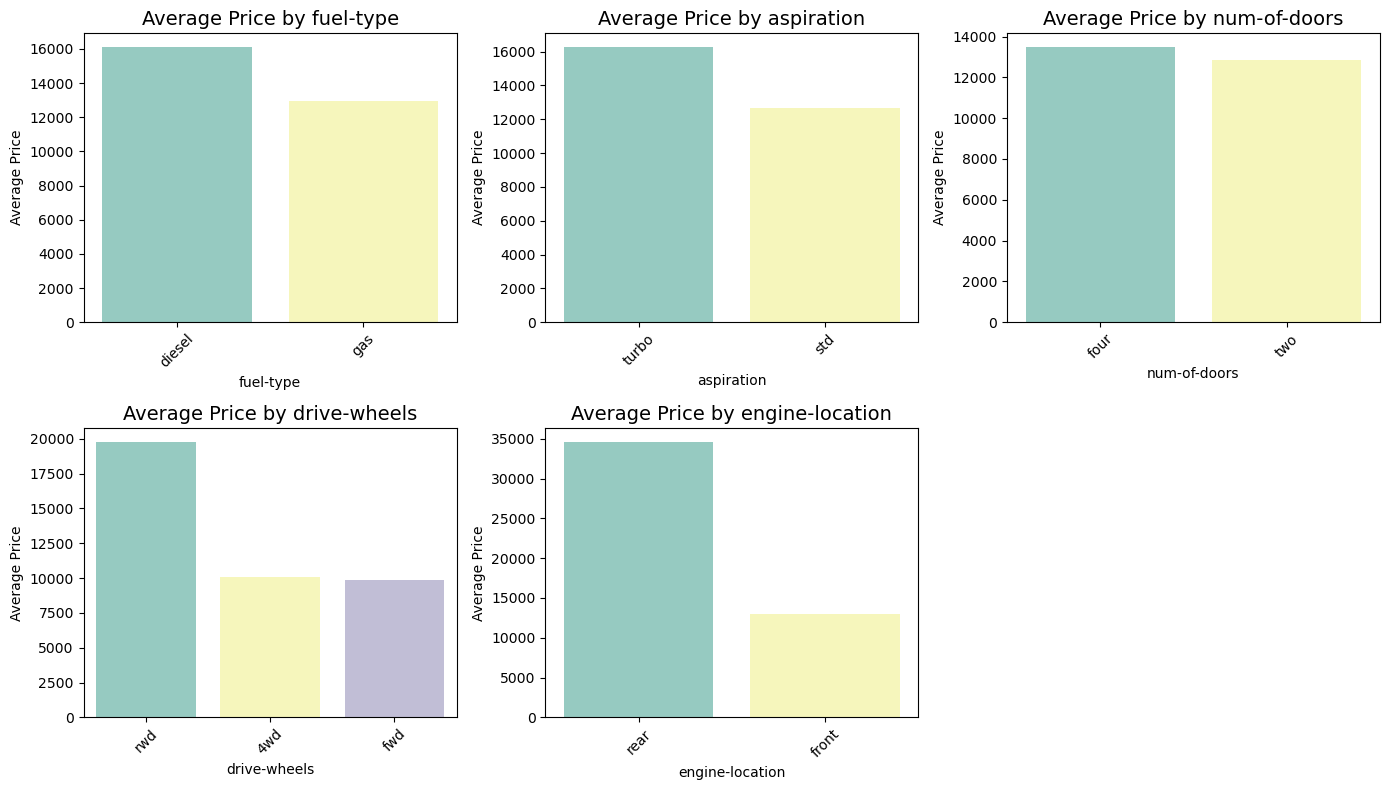

In [31]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(b):
    plt.subplot(2, 3, i+1)
    
    price_analysis = df.groupby(col)['price'].mean().reset_index().sort_values(by='price', ascending=False).head(5)
    sns.barplot(x=price_analysis[col], y=price_analysis['price'], palette='Set3')
    plt.title(f'Average Price by {col}', fontsize=14)
    plt.ylabel('Average Price')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- `Diesel cars` tend to have a `higher average price` than petrol cars, likely due to their more complex engine configurations and higher efficiency for long-distance driving.
- `Cars with turbocharged engines` are more expensive than those with standard (naturally aspirated) engines, as turbocharged engines often provide higher performance and are used in more premium models.
- `Cars with two and four doors` tend to have a similar price, suggesting that the number of doors doesn’t significantly impact the price in your dataset.
- `RWD cars generally` have a higher price than FWD cars, which could be due to their association with sports and luxury cars that typically feature RWD.
- `Cars with a rear engine location` are more expensive than those with a front engine location, likely due to the unique engineering and performance benefits of rear-engine cars, such as those found in high-end sports cars.

---------

### Multivariate Analysis

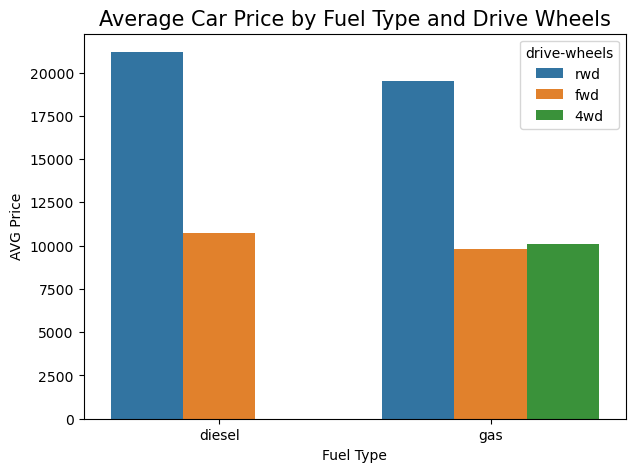

In [32]:
fuel_drive_price = df.groupby(['fuel-type','drive-wheels'])['price'].mean().reset_index().sort_values(by='price',ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x='fuel-type',y='price',data=fuel_drive_price,hue='drive-wheels')
plt.title('Average Car Price by Fuel Type and Drive Wheels',fontsize=15)
plt.xlabel('Fuel Type')
plt.ylabel('AVG Price')
plt.show()

Rear-wheel drive (RWD) cars tend to be more expensive, and most of them are available in both diesel and gas fuel types. On the other hand, four-wheel drive (4WD) cars are only available with gas engines.

-------

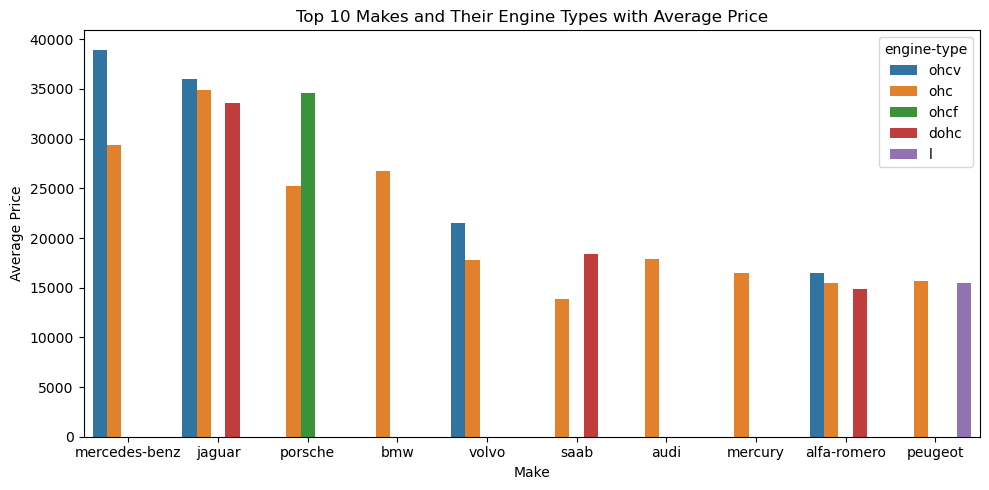

In [33]:
make_engine_avgprice = df.groupby(['make', 'engine-type'])['price'].mean().sort_values(ascending=False).reset_index()
top_10_makes = make_engine_avgprice.groupby('make')['price'].mean().sort_values(ascending=False).head(10).index
top_10_make_engine_avgprice = make_engine_avgprice[make_engine_avgprice['make'].isin(top_10_makes)]

plt.figure(figsize=(10, 5))
sns.barplot(x='make', y='price', data=top_10_make_engine_avgprice, hue='engine-type')
plt.title('Top 10 Makes and Their Engine Types with Average Price')
plt.xlabel('Make')
plt.ylabel('Average Price') 
plt.tight_layout()
plt.show()

- `Mercedes-Benz` and `Volvo` are equipped with `OHC and OHCV` engine configurations. Among these, Mercedes-Benz exhibits the highest average price, indicating a premium positioning across both engine types.
- `Jaguar and Alfa Romeo` offer a diverse range of engine architectures, including `OHC, OHCV, and DOHC`. Notably, Jaguar demonstrates the highest pricing across these configurations, reflecting its focus on high-performance and luxury segments.
- `Porsche` models are available with `OHC and OHCF` engine types. Within the OHCF category, Porsche leads with the most expensive offerings, underscoring its engineering exclusivity and brand prestige.
- `BMW, Mercury, and Audi` all utilize the `OHC engine type`. BMW stands out with the highest pricing among this group, consistent with its reputation for delivering performance-oriented vehicles with advanced engineering.
- `Peugeot` employs both `OHC and inline engine types`. Across both configurations, Peugeot leads in price within its engine categories, suggesting a relatively higher valuation for its engineering choices in the compact and mid-size car segments.

----------

In [34]:
#df_subset = df[['length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'peak-rpm' ,'price']]
#df_subset['price_category'] = pd.qcut(df_subset['price'], q=3, labels=['Low', 'Medium', 'High'])

# Plot with categorical hue
#sns.pairplot(df_subset, hue='price_category', palette='viridis')
#plt.suptitle('Pairplot: Features vs. Price Category', y=1.02)
#plt.show()

-----------

### Correlation Matrix

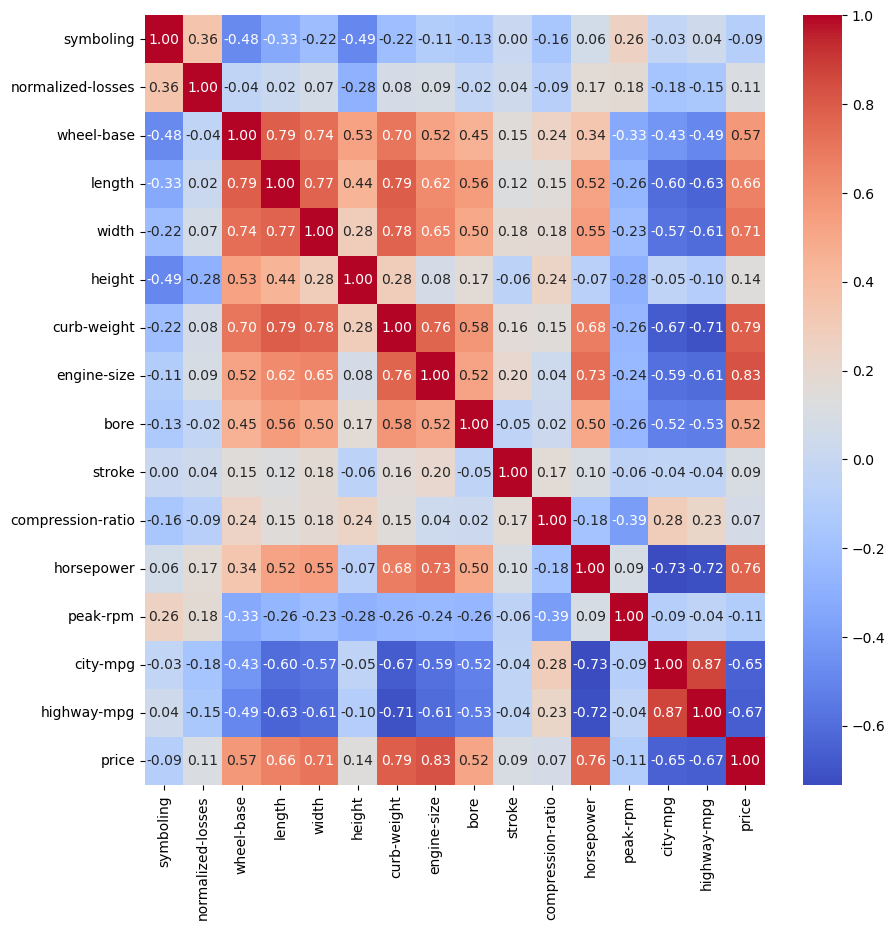

In [35]:
num = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [36]:
correlation_with_target = df[numerical_features].corr()['price'].sort_values(ascending=False)

print("Top positively correlated:\n", correlation_with_target)
print("\nTop negatively correlated:\n", correlation_with_target)

Top positively correlated:
 price                1.000000
engine-size          0.827361
curb-weight          0.789834
horsepower           0.763740
width                0.709816
length               0.663409
wheel-base           0.566932
bore                 0.517864
height               0.139918
normalized-losses    0.109223
stroke               0.092514
compression-ratio    0.073594
symboling           -0.092012
peak-rpm            -0.108704
city-mpg            -0.650491
highway-mpg         -0.665871
Name: price, dtype: float64

Top negatively correlated:
 price                1.000000
engine-size          0.827361
curb-weight          0.789834
horsepower           0.763740
width                0.709816
length               0.663409
wheel-base           0.566932
bore                 0.517864
height               0.139918
normalized-losses    0.109223
stroke               0.092514
compression-ratio    0.073594
symboling           -0.092012
peak-rpm            -0.108704
city-mpg       

- **`Target column: Price`, engine-size, curb-weight, horsepower, width, length, wheel-base, bore, highway-mpg, city-mpg these are the highly correlated feature**
- **Engine size, curb-weight, horsepower, width highly correlated with target column so we keep them**  

In [37]:
features_df = df[numerical_features].drop(columns=['price'])
corr_matrix = features_df.corr()

threshold = 0.7

high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().reset_index())
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr[abs(high_corr['Correlation']) > threshold]

print("Highly correlated input features:\n", high_corr.sort_values(by='Correlation', ascending=False))

Highly correlated input features:
        Feature 1    Feature 2  Correlation
104     city-mpg  highway-mpg     0.866629
41        length  curb-weight     0.792465
27    wheel-base       length     0.788264
51         width  curb-weight     0.775055
39        length        width     0.773800
69   curb-weight  engine-size     0.764232
28    wheel-base        width     0.735519
80   engine-size   horsepower     0.733774
30    wheel-base  curb-weight     0.704463
76   curb-weight  highway-mpg    -0.711205
101   horsepower  highway-mpg    -0.718016
100   horsepower     city-mpg    -0.734102


  - **Engine size, curb-weight, horsepower, highly correlated with target column**  
  - **Remove length, wheel-base, width, city-mpg**

--------

## Linear Regression

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

**I have to apply the following ML techniques:**
- To evaluate different machine learning algorithms on the dataset, I implemented and applied pipelines for three regression models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Each model was encapsulated in a separate Pipeline, which included both preprocessing steps and the respective regressor. These pipelines were then fitted and evaluated using the same training and testing sets to ensure a fair comparison of model performance.

**Linear Regression Pipeline**

- I make a pipeline for linear regression 
- Encode categorical variables, for the model
- One hot encode for nominal cat features, and Ordinal encode for ordinal cat features

In [ ]:
cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
doors_order = ['two', 'four']

lr_trans_1 = ColumnTransformer([
    
    ('ohe', OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
     ['make','engine-location','fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']),
    ('ord_enco', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[cylinders_order, doors_order]),
     ['num-of-cylinders', 'num-of-doors'])
], remainder='passthrough')

**Find the less correlated features with the target variable and remove them**

In [45]:
features_df = df.drop(columns=['price'])

X_transformed = lr_trans_1.fit_transform(features_df)
X_transformed_df = pd.DataFrame(X_transformed, columns=lr_trans_1.get_feature_names_out())

corr_matrix = X_transformed_df.corr()
threshold = 0.7

high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().reset_index())
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr[abs(high_corr['Correlation']) > threshold]

print("Highly correlated input features:\n", high_corr.sort_values(by='Correlation', ascending=False))

Highly correlated input features:
                        Feature 1                     Feature 2  Correlation
1496        ohe__fuel-system_idi  remainder__compression-ratio     0.879595
1710         remainder__city-mpg        remainder__highway-mpg     0.866629
647            ohe__make_peugeot            ohe__engine-type_l     0.851185
864             ohe__make_subaru         ohe__engine-type_ohcf     0.801845
1647           remainder__length        remainder__curb-weight     0.792465
1633       remainder__wheel-base             remainder__length     0.788264
1657            remainder__width        remainder__curb-weight     0.775055
1412      ohe__engine-type_rotor         ohe__fuel-system_4bbl     0.774690
1645           remainder__length              remainder__width     0.773800
1675      remainder__curb-weight        remainder__engine-size     0.764232
1583  ord_enco__num-of-cylinders        remainder__engine-size     0.746622
727            ohe__make_porsche     ohe__engine-loca

In [67]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [68]:
X1 = df.drop(['symboling', 'normalized-losses','bore', 'stroke','height', 'compression-ratio', 'symboling', 'peak-rpm', 'highway-mpg', 'price'],  axis=1)
y1 = df['price']

In [69]:
lr_pipeline_1 = Pipeline([('preprocessor', lr_trans_1),
                          ('regressor', LinearRegression())])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
lr_pipeline_1.fit(X_train1, y_train1)

y_train_pred1 = lr_pipeline_1.predict(X_train1)
y_test_pred1 = lr_pipeline_1.predict(X_test1)

**Evaluation Metrics**

In [70]:
train_mae1 = mean_absolute_error(y_train1, y_train_pred1)
test_mae1 = mean_absolute_error(y_test1, y_test_pred1)
# RMSE
train_rmse1 = np.sqrt(mean_squared_error(y_train1, y_train_pred1))
test_rmse1 = np.sqrt(mean_squared_error(y_test1, y_test_pred1))
# R² Score
train_r21 = r2_score(y_train1, y_train_pred1)
test_r21 = r2_score(y_test1, y_test_pred1)
# Adjusted R²
def adjusted_r21(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))
n_train1, k1 = X_train1.shape
n_test1 = X_test1.shape[0]
train_adj_r21 = adjusted_r21(train_r21, n_train1, k1)
test_adj_r21 = adjusted_r21(test_r21, n_test1, k1)

print('After removing less correlated Features')
print(f"\nTrain MAE: {train_mae1:.4f}")
print(f"Test MAE: {test_mae1:.4f}")
print('==============================')
print(f"\nTrain RMSE: {train_rmse1:.4f}")
print(f"Test RMSE: {test_rmse1:.4f}")
print('==============================')
print(f"\nTrain R²: {train_r21:.4f}")
print(f"Test R²: {test_r21:.4f}")
print('==============================')
print(f"\nTrain Adjusted R²: {train_adj_r21:.4f}")
print(f"Test Adjusted R²: {test_adj_r21:.4f}")

After removing less correlated Features

Train MAE: 1537.4394
Test MAE: 1565.8101

Train RMSE: 2272.0123
Test RMSE: 2292.3535

Train R²: 0.9188
Test R²: 0.9154

Train Adjusted R²: 0.9187
Test Adjusted R²: 0.9152


- **Compared to the model with all features, we achieved similar performance using fewer features, while still maintaining a good fit without signs of overfitting**
- ** Also model is not overfitting**

-----------

**Visualization of residuals to evaluate model performance for both feature sets**

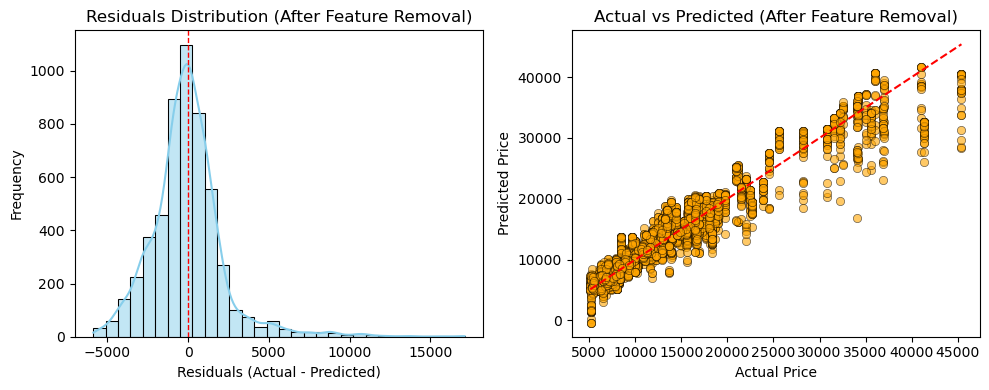

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4)) 

residuals1 = y_test1 - y_test_pred1
sns.histplot(residuals1, bins=30, kde=True, color="skyblue", edgecolor="black", ax=ax[0])
ax[0].axvline(x=0, color='red', linestyle='--', linewidth=1)
ax[0].set_title("Residuals Distribution (After Feature Removal)")
ax[0].set_xlabel("Residuals (Actual - Predicted)")
ax[0].set_ylabel("Frequency")

sns.scatterplot(x=y_test1, y=y_test_pred1, alpha=0.6, color='orange', edgecolor='k', ax=ax[1])
ax[1].plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], color='red', linestyle='--')
ax[1].set_title("Actual vs Predicted (After Feature Removal)")
ax[1].set_xlabel("Actual Price")
ax[1].set_ylabel("Predicted Price")

plt.tight_layout()
plt.show()

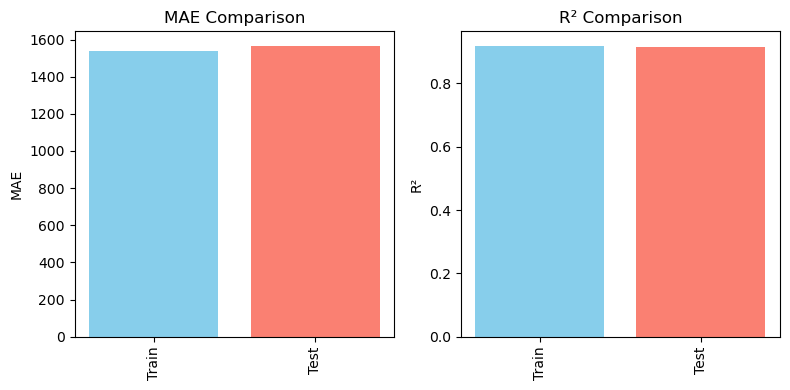

In [83]:
metrics = {'MAE': [train_mae1, test_mae1],
           'R²': [train_r21, test_r21]}

labels = ['Train', 'Test']

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

metrics_list = list(metrics.keys())

for i, metric in enumerate(metrics_list):
    ax[i].bar(range(len(labels)), metrics[metric], color=['skyblue', 'salmon'])
    ax[i].set_title(f'{metric} Comparison')
    ax[i].set_ylabel(metric)
    ax[i].set_xticks(range(len(labels)))
    ax[i].set_xticklabels(labels, rotation=90)

plt.tight_layout()
plt.show()

------------

## Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

**Pipeline for Decision Tree Regression**

In [52]:
cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
doors_order = ['two', 'four']

dtr = ColumnTransformer([
    # OneHotEncoder for categorical features which are nominal
    ('ohe', OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore'),
     ['make','engine-location','fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']),

    # OrdinalEncoder for categorical features which are ordinal
    ('ord_enco', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[cylinders_order, doors_order]),
     ['num-of-cylinders', 'num-of-doors'])
], remainder='passthrough')

In [53]:
dtr_x = df.drop(columns='price')
dtr_y = df['price']

In [54]:
dtr_pipeline = Pipeline([
    ('preprocessor', dtr),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Split the data into train and test sets
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(dtr_x, dtr_y, test_size=0.2, random_state=42)

# Fit the model on the training set
dtr_pipeline.fit(X_train_dtr, y_train_dtr)

# Predict on train and test sets
y_train_pred_dtr = dtr_pipeline.predict(X_train_dtr)
y_test_pred_dtr = dtr_pipeline.predict(X_test_dtr)

# Evaluation Metrics
train_mae_dtr = mean_absolute_error(y_train_dtr, y_train_pred_dtr)
test_mae_dtr = mean_absolute_error(y_test_dtr, y_test_pred_dtr)

train_rmse_dtr = np.sqrt(mean_squared_error(y_train_dtr, y_train_pred_dtr))
test_rmse_dtr = np.sqrt(mean_squared_error(y_test_dtr, y_test_pred_dtr))

train_r2_dtr = r2_score(y_train_dtr, y_train_pred_dtr)
test_r2_dtr = r2_score(y_test_dtr, y_test_pred_dtr)

# Adjusted R² calculation
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train_dtr, k_dtr = X_train_dtr.shape
n_test_dtr = X_test_dtr.shape[0]

train_adj_r2_dtr = adjusted_r2(train_r2_dtr, n_train_dtr, k_dtr)
test_adj_r2_dtr = adjusted_r2(test_r2_dtr, n_test_dtr, k_dtr)

# Output metrics
print(f"Train MAE: {train_mae_dtr:.4f}")
print(f"Test MAE: {test_mae_dtr:.4f}")
print(f"\nTrain RMSE: {train_rmse_dtr:.4f}")
print(f"Test RMSE: {test_rmse_dtr:.4f}")
print(f"\nTrain R²: {train_r2_dtr:.4f}")
print(f"Test R²: {test_r2_dtr:.4f}")
print(f"\nTrain Adjusted R²: {train_adj_r2_dtr:.4f}")
print(f"Test Adjusted R²: {test_adj_r2_dtr:.4f}")

Train MAE: 18.7438
Test MAE: 134.9032

Train RMSE: 130.6544
Test RMSE: 727.7538

Train R²: 0.9997
Test R²: 0.9915

Train Adjusted R²: 0.9997
Test Adjusted R²: 0.9914


**For all features**
- 'regressor__criterion': 'squared_error', 'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__max_leaf_nodes': None,
- 'regressor__min_impurity_decrease': 0.0, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__min_weight_fraction_leaf': 0.0,
- 'regressor__monotonic_cst': None, 'regressor__random_state': 42, 'regressor__splitter': 'best'}

In [55]:
importances = dtr_pipeline.named_steps['regressor'].feature_importances_
feature_names = dtr_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for easier interpretation
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))


Top 10 Most Important Features:
                   Feature  Importance
51  remainder__engine-size    0.620182
50  remainder__curb-weight    0.233165
58  remainder__highway-mpg    0.038598
47       remainder__length    0.021679
55   remainder__horsepower    0.016801
48        remainder__width    0.016430
1            ohe__make_bmw    0.010914
53       remainder__stroke    0.008441
56     remainder__peak-rpm    0.007660
46   remainder__wheel-base    0.004111


engine-size, curb-weight, highway-mpg, length, horsepower, width, make, stroke, peak-rpm, wheel-base

In [56]:
param_grid = {
    'regressor__splitter' : ['random', 'best', None],
    'regressor__max_depth' : [30,40,65,80,100,None],
    'regressor__max_features' : ['sqrt', 'log2', None]}

# Set up GridSearchCV
grid_search = GridSearchCV(dtr_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_dtr, y_train_dtr)

# Best hyperparameters found by GridSearchCV
print("Best Hyperparameters Found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters Found by GridSearchCV:
{'regressor__max_depth': 65, 'regressor__max_features': None, 'regressor__splitter': 'random'}


In [57]:
# Use the best estimator from the grid search
best_dtr_pipeline = grid_search.best_estimator_

# Predict using the best model
y_train_pred_best = best_dtr_pipeline.predict(X_train_dtr)
y_test_pred_best = best_dtr_pipeline.predict(X_test_dtr)

# Evaluation Metrics for Best Model
train_mae_best = mean_absolute_error(y_train_dtr, y_train_pred_best)
test_mae_best = mean_absolute_error(y_test_dtr, y_test_pred_best)

train_rmse_best = np.sqrt(mean_squared_error(y_train_dtr, y_train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test_dtr, y_test_pred_best))

train_r2_best = r2_score(y_train_dtr, y_train_pred_best)
test_r2_best = r2_score(y_test_dtr, y_test_pred_best)

# Adjusted R² for the Best Model
train_adj_r2_best = adjusted_r2(train_r2_best, n_train_dtr, k_dtr)
test_adj_r2_best = adjusted_r2(test_r2_best, n_test_dtr, k_dtr)

# Output Metrics for Best Model
print(f"\nBest Model Train MAE: {train_mae_best:.4f}")
print(f"Best Model Test MAE: {test_mae_best:.4f}")
print(f"\nBest Model Train RMSE: {train_rmse_best:.4f}")
print(f"Best Model Test RMSE: {test_rmse_best:.4f}")
print(f"\nBest Model Train R²: {train_r2_best:.4f}")
print(f"Best Model Test R²: {test_r2_best:.4f}")
print(f"\nBest Model Train Adjusted R²: {train_adj_r2_best:.4f}")
print(f"Best Model Test Adjusted R²: {test_adj_r2_best:.4f}")


Best Model Train MAE: 18.7438
Best Model Test MAE: 155.1055

Best Model Train RMSE: 130.6544
Best Model Test RMSE: 803.9001

Best Model Train R²: 0.9997
Best Model Test R²: 0.9896

Best Model Train Adjusted R²: 0.9997
Best Model Test Adjusted R²: 0.9896


In [58]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

engine-size, curb-weight, highway-mpg, length, width, horsepower

In [59]:
cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
doors_order = ['two', 'four']

# ColumnTransformer setup
dtr1 = ColumnTransformer([
    # OneHotEncoder for nominal categorical features
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['make', 'engine-location', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']),

    # OrdinalEncoder for ordinal categorical features
    ('ord_enco', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,
                                categories=[cylinders_order, doors_order]),
     ['num-of-cylinders', 'num-of-doors'])
], remainder='passthrough')

# Define X and y after dropping less useful columns
dtrx_1 = df.drop(['symboling', 'normalized-losses', 'bore', 'stroke', 'height',
                  'compression-ratio', 'peak-rpm', 'highway-mpg', 'price'], axis=1)
dtry_1 = df['price']

# Pipeline
dtr1_pipeline = Pipeline([
    ('preprocessor', dtr1),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train-test split
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(dtrx_1, dtry_1, test_size=0.2, random_state=42)

# Fit the pipeline
dtr1_pipeline.fit(X_train_dtr, y_train_dtr)

# Predictions
y_train_pred_dtr = dtr1_pipeline.predict(X_train_dtr)
y_test_pred_dtr = dtr1_pipeline.predict(X_test_dtr)

# Evaluation Metrics
train_mae_dtr = mean_absolute_error(y_train_dtr, y_train_pred_dtr)
test_mae_dtr = mean_absolute_error(y_test_dtr, y_test_pred_dtr)

train_rmse_dtr = np.sqrt(mean_squared_error(y_train_dtr, y_train_pred_dtr))
test_rmse_dtr = np.sqrt(mean_squared_error(y_test_dtr, y_test_pred_dtr))

train_r2_dtr = r2_score(y_train_dtr, y_train_pred_dtr)
test_r2_dtr = r2_score(y_test_dtr, y_test_pred_dtr)

# Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train_dtr, k_dtr = X_train_dtr.shape
n_test_dtr = X_test_dtr.shape[0]

train_adj_r2_dtr = adjusted_r2(train_r2_dtr, n_train_dtr, k_dtr)
test_adj_r2_dtr = adjusted_r2(test_r2_dtr, n_test_dtr, k_dtr)

# Output metrics
print(f"Train MAE: {train_mae_dtr:.4f}")
print(f"Test MAE: {test_mae_dtr:.4f}")
print(f"\nTrain RMSE: {train_rmse_dtr:.4f}")
print(f"Test RMSE: {test_rmse_dtr:.4f}")
print(f"\nTrain R²: {train_r2_dtr:.4f}")
print(f"Test R²: {test_r2_dtr:.4f}")
print(f"\nTrain Adjusted R²: {train_adj_r2_dtr:.4f}")
print(f"Test Adjusted R²: {test_adj_r2_dtr:.4f}")



Train MAE: 63.6394
Test MAE: 136.5790

Train RMSE: 270.9039
Test RMSE: 610.3365

Train R²: 0.9988
Test R²: 0.9940

Train Adjusted R²: 0.9988
Test Adjusted R²: 0.9940


In [60]:
param_grid = {
    'regressor__max_depth': [20,30,40,50, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__splitter': ['best', 'random']
}

# Set up GridSearchCV
grid_search = GridSearchCV(dtr1_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_dtr, y_train_dtr)

# Best hyperparameters found by GridSearchCV
print("Best Hyperparameters Found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters Found by GridSearchCV:
{'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__splitter': 'best'}


In [61]:
# Use the best estimator from the grid search
best_dtr_pipeline = grid_search.best_estimator_

# Predict using the best model
y_train_pred_best = best_dtr_pipeline.predict(X_train_dtr)
y_test_pred_best = best_dtr_pipeline.predict(X_test_dtr)

# Evaluation Metrics for Best Model
train_mae_best = mean_absolute_error(y_train_dtr, y_train_pred_best)
test_mae_best = mean_absolute_error(y_test_dtr, y_test_pred_best)

train_rmse_best = np.sqrt(mean_squared_error(y_train_dtr, y_train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test_dtr, y_test_pred_best))

train_r2_best = r2_score(y_train_dtr, y_train_pred_best)
test_r2_best = r2_score(y_test_dtr, y_test_pred_best)

# Adjusted R² for the Best Model
train_adj_r2_best = adjusted_r2(train_r2_best, n_train_dtr, k_dtr)
test_adj_r2_best = adjusted_r2(test_r2_best, n_test_dtr, k_dtr)

# Output Metrics for Best Model
print(f"\nBest Model Train MAE: {train_mae_best:.4f}")
print(f"Best Model Test MAE: {test_mae_best:.4f}")
print(f"\nBest Model Train RMSE: {train_rmse_best:.4f}")
print(f"Best Model Test RMSE: {test_rmse_best:.4f}")
print(f"\nBest Model Train R²: {train_r2_best:.4f}")
print(f"Best Model Test R²: {test_r2_best:.4f}")
print(f"\nBest Model Train Adjusted R²: {train_adj_r2_best:.4f}")
print(f"Best Model Test Adjusted R²: {test_adj_r2_best:.4f}")


Best Model Train MAE: 94.8168
Best Model Test MAE: 158.4989

Best Model Train RMSE: 336.0533
Best Model Test RMSE: 669.0084

Best Model Train R²: 0.9982
Best Model Test R²: 0.9928

Best Model Train Adjusted R²: 0.9982
Best Model Test Adjusted R²: 0.9928


**For some features**
- 'regressor__criterion': 'squared_error', 'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__max_leaf_nodes': None
- 'regressor__min_impurity_decrease': 0.0, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__min_weight_fraction_leaf': 0.0
- 'regressor__monotonic_cst': None, 'regressor__random_state': 42, 'regressor__splitter': 'best'}

------------

## Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
doors_order = ['two', 'four']

# ColumnTransformer setup
rf_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['make', 'engine-location', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,
                           categories=[cylinders_order, doors_order]),
     ['num-of-cylinders', 'num-of-doors'])
], remainder='passthrough')

# Drop less useful columns
rf_X = df.drop(['price'], axis=1)
rf_y = df['price']

# Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', rf_transformer),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(rf_X, rf_y, test_size=0.2, random_state=42)

# Fit the pipeline
rf_pipeline.fit(X_train_rf, y_train_rf)

# Predictions
y_train_pred_rf = rf_pipeline.predict(X_train_rf)
y_test_pred_rf = rf_pipeline.predict(X_test_rf)

# Evaluation
train_mae_rf = mean_absolute_error(y_train_rf, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test_rf, y_test_pred_rf)

train_rmse_rf = np.sqrt(mean_squared_error(y_train_rf, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_test_pred_rf))

train_r2_rf = r2_score(y_train_rf, y_train_pred_rf)
test_r2_rf = r2_score(y_test_rf, y_test_pred_rf)

# Adjusted R² function
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train_rf, k_rf = X_train_rf.shape
n_test_rf = X_test_rf.shape[0]

train_adj_r2_rf = adjusted_r2(train_r2_rf, n_train_rf, k_rf)
test_adj_r2_rf = adjusted_r2(test_r2_rf, n_test_rf, k_rf)

# Output metrics
print(f"Train MAE: {train_mae_rf:.4f}")
print(f"Test MAE: {test_mae_rf:.4f}")
print(f"\nTrain RMSE: {train_rmse_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}")
print(f"\nTrain R²: {train_r2_rf:.4f}")
print(f"Test R²: {test_r2_rf:.4f}")
print(f"\nTrain Adjusted R²: {train_adj_r2_rf:.4f}")
print(f"Test Adjusted R²: {test_adj_r2_rf:.4f}")

Train MAE: 61.3251
Test MAE: 134.0879

Train RMSE: 233.3462
Test RMSE: 549.8481

Train R²: 0.9991
Test R²: 0.9951

Train Adjusted R²: 0.9991
Test Adjusted R²: 0.9951


In [64]:
ohe_features = rf_pipeline.named_steps['preprocessor'].named_transformers_['ohe'].get_feature_names_out(
    ['make', 'engine-location', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
)
ord_features = ['num-of-cylinders', 'num-of-doors']
other_features = [col for col in rf_X.columns if col not in
                  ['make', 'engine-location', 'fuel-type', 'aspiration',
                   'body-style', 'drive-wheels', 'engine-type', 'fuel-system',
                   'num-of-cylinders', 'num-of-doors']]

# Combine all feature names
all_features = list(ohe_features) + ord_features + other_features

# Get feature importances
importances = rf_pipeline.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))


Top 10 Important Features:
        Feature  Importance
51  engine-size    0.618449
50  curb-weight    0.235866
58  highway-mpg    0.039681
48        width    0.017107
57     city-mpg    0.012130
55   horsepower    0.011756
1      make_bmw    0.010880
47       length    0.010574
46   wheel-base    0.009830
56     peak-rpm    0.006362


In [65]:
# Define orders for ordinal encoding
cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
doors_order = ['two', 'four']

# ColumnTransformer setup
rf_transformer1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['make', 'engine-location', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,
                           categories=[cylinders_order, doors_order]),
     ['num-of-cylinders', 'num-of-doors'])
], remainder='passthrough')

# Define features and target
rf_X1 = df.drop(['symboling', 'normalized-losses', 'bore', 'stroke', 'height',
                  'compression-ratio', 'peak-rpm', 'highway-mpg', 'price'], axis=1)
rf_y1 = df['price']

# Pipeline
rf_pipeline1 = Pipeline([
    ('preprocessor', rf_transformer1),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train-test split
X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(rf_X1, rf_y1, test_size=0.2, random_state=42)

# Fit the pipeline
rf_pipeline1.fit(X_train_rf1, y_train_rf1)

# Predictions
y_train_pred_rf1 = rf_pipeline1.predict(X_train_rf1)
y_test_pred_rf1 = rf_pipeline1.predict(X_test_rf1)

# Evaluation
train_mae_rf1 = mean_absolute_error(y_train_rf1, y_train_pred_rf1)
test_mae_rf1 = mean_absolute_error(y_test_rf1, y_test_pred_rf1)

train_rmse_rf1 = np.sqrt(mean_squared_error(y_train_rf1, y_train_pred_rf1))
test_rmse_rf1 = np.sqrt(mean_squared_error(y_test_rf1, y_test_pred_rf1))

train_r2_rf1 = r2_score(y_train_rf1, y_train_pred_rf1)
test_r2_rf1 = r2_score(y_test_rf1, y_test_pred_rf1)

# Adjusted R² function
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train_rf1, k_rf1 = X_train_rf1.shape
n_test_rf1 = X_test_rf1.shape[0]

train_adj_r2_rf1 = adjusted_r2(train_r2_rf1, n_train_rf1, k_rf1)
test_adj_r2_rf1 = adjusted_r2(test_r2_rf1, n_test_rf1, k_rf1)

# Output metrics
print(f"Train MAE: {train_mae_rf1:.4f}")
print(f"Test MAE: {test_mae_rf1:.4f}")
print(f"\nTrain RMSE: {train_rmse_rf1:.4f}")
print(f"Test RMSE: {test_rmse_rf1:.4f}")
print(f"\nTrain R²: {train_r2_rf1:.4f}")
print(f"Test R²: {test_r2_rf1:.4f}")
print(f"\nTrain Adjusted R²: {train_adj_r2_rf1:.4f}")
print(f"Test Adjusted R²: {test_adj_r2_rf1:.4f}")

Train MAE: 91.0019
Test MAE: 142.6895

Train RMSE: 320.2313
Test RMSE: 537.4713

Train R²: 0.9984
Test R²: 0.9954

Train Adjusted R²: 0.9984
Test Adjusted R²: 0.9953


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters Found: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}

Train MAE: 102.2506
Test MAE: 172.2420

Train RMSE: 303.2065
Test RMSE: 470.2784

Train R²: 0.9986
Test R²: 0.9964

Train Adjusted R²: 0.9986
Test Adjusted R²: 0.9964